### PROJECT BASED TUGAS TIPE 3

Anggota Kelompok :
1. Fijar Yasmina Pritama - 1301200215
2. Aisyah Dliya Ramadhanti - 1301201154
3. Henzi Juandri - 1301202285
4. Rafli Muhammad Fakhreza - 1301204006

**Nama Dataset : German Credit (Algoritma Klasifikasi dan Metode Boosting)**


###DATA UNDERSTANDING

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!gdown --id 1As_iOR5HbBjaryZj19BayMsmYS__NRuA

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1As_iOR5HbBjaryZj19BayMsmYS__NRuA
To: /content/german_credit.csv
100% 277k/277k [00:00<00:00, 70.3MB/s]


In [ ]:
#Membaca dataset
data = pd.read_csv('german_credit.csv', sep =';')

In [ ]:
#Memberikan informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
#Mengetahui nilai statistik dataset
data.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [ ]:
#Menampilkan jumlah baris data yang memiliki nilai berbeda
data.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

In [ ]:
#Menampilkan 5 data pertama dari dataset
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,03-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,03-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,03-Feb,unskilled - resident,0 to 2,no,yes,good


#DATA PREPARATION

***Data Formatting***

In [ ]:
#Data Formatting pada Atribut Status
data['status'] = data['status'].replace(['... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year', 'no checking account'],
                                        ['A11', 'A12', 'A13', 'A14'])

In [ ]:
#Data Formatting pada Atribut Credit History
data['credit_history'] = data['credit_history'].replace(['no credits taken/all credits paid back duly',
                                                         'all credits at this bank paid back duly',
                                                         'existing credits paid back duly till now',
                                                         'delay in paying off in the past',
                                                         'critical account/other credits elsewhere'],
                                        ['A30', 'A31', 'A32', 'A33' , 'A34'])

In [ ]:
#Data Formatting pada Atribut Purpose
data['purpose'] = data['purpose'].replace(['car (new)', 'car (used)', 'furniture/equipment', 'radio/television', 'domestic appliances', 'repairs',
                                           'vacation', 'retraining', 'business', 'others'],
                                        ['A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A47', 'A48', 'A49', 'A10'])

In [ ]:
#Data Formatting pada Atribut Savings
data['savings'] = data['savings'].replace(['... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM', 'unknown/no savings account'],
                                        ['A61', 'A62', 'A63', 'A64', 'A65'])

In [ ]:
#Data Formatting pada Atribut Duration
data['employment_duration'] = data['employment_duration'].replace(['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
                                        ['A71', 'A72', 'A73', 'A74', 'A75'])

In [ ]:
#Data Formatting pada Atribut Personal Status Sex
data['personal_status_sex'] = data['personal_status_sex'].replace(['male : divorced/separated', 'female : non-single or male : single', 'male : married/widowed', 'female : single'],
                                        ['A91', 'A923', 'A94', 'A95'])

In [ ]:
#Data Formatting pada Atribut Other Debtors
data['other_debtors'] = data['other_debtors'].replace(['none', 'co-applicant', 'guarantor'],
                                        ['A101', 'A102', 'A103'])

In [ ]:
#Data Formatting pada Atribut Property
data['property'] = data['property'].replace(['real estate', 'building soc. savings agr./life insurance' , 'car or other', 'unknown / no property'],
                                        ['A121', 'A122', 'A123', 'A124'])

In [ ]:
#Data Formatting pada Atribut Other Installment Plans
data['other_installment_plans'] = data['other_installment_plans'].replace(['bank', 'stores' , 'none'],
                                        ['A141', 'A142', 'A143'])

In [ ]:
#Data Formatting pada Atribut Housing
data['housing'] = data['housing'].replace(['rent', 'own' , 'for free'],
                                        ['A151', 'A152', 'A153'])

In [ ]:
#Data Formatting pada Atribut Job
data['job'] = data['job'].replace(['unemployed/unskilled - non-resident', 'unskilled - resident' , 'skilled employee/official', 'manager/self-empl./highly qualif. employee'],
                                        ['A171', 'A172', 'A173', 'A174'])

In [ ]:
#Data Formatting pada Atribut Telephone
data['telephone'] = data['telephone'].replace(['no' , 'yes (under customer name)'],
                                        ['A191', 'A192'])

In [ ]:
#Data Formatting pada Atribut Foreign Worker
data['foreign_worker'] = data['foreign_worker'].replace(['yes' , 'no'],
                                        ['A201', 'A202'])

***Dataset Setelah dilakukan Data Formatting***

In [ ]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A14,18,A31,A41,1049,A65,A72,< 20,A923,A101,...,A123,21,A143,A153,1,A173,0 to 2,A191,A202,good
1,A14,9,A31,A10,2799,A65,A73,25 <= ... < 35,A94,A101,...,A124,36,A143,A153,03-Feb,A173,3 or more,A191,A202,good
2,A11,12,A30,A48,841,A61,A74,25 <= ... < 35,A923,A101,...,A124,23,A143,A153,1,A172,0 to 2,A191,A202,good
3,A14,12,A31,A10,2122,A65,A73,20 <= ... < 25,A94,A101,...,A124,39,A143,A153,03-Feb,A172,3 or more,A191,A201,good
4,A14,12,A31,A10,2171,A65,A73,< 20,A94,A101,...,A123,38,A141,A151,03-Feb,A172,0 to 2,A191,A201,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,24,A30,A42,1987,A65,A73,25 <= ... < 35,A94,A101,...,A124,21,A143,A153,1,A172,3 or more,A191,A202,bad
996,A14,24,A30,A10,2303,A65,A75,< 20,A94,A102,...,A124,45,A143,A151,1,A173,0 to 2,A191,A202,bad
997,A13,21,A31,A10,12680,A64,A75,< 20,A94,A101,...,A121,30,A143,A152,1,A174,0 to 2,A192,A202,bad
998,A11,12,A30,A42,6468,A64,A71,25 <= ... < 35,A94,A101,...,A121,52,A143,A151,1,A174,0 to 2,A192,A202,bad


***Proses Label Encoding setiap Atribut***

In [ ]:
#Membuat objek label encoder
label_encoder = preprocessing.LabelEncoder()

Label encoding pada atribut dataset (bertipe object) yang dilakukan proses data formatting

In [ ]:
categories = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans',
              'housing', 'job', 'telephone', 'foreign_worker']

for i in categories:
  data[i] = label_encoder.fit_transform(data[i])

Label encoding pada atribut dataset (bertipe object) yang tidak dilakukan proses data formatting

In [ ]:
#Proses label encoding pada atribut installment rate
data['installment_rate']= label_encoder.fit_transform(data['installment_rate'])

#Proses label encoding pada atribut president residence
data['present_residence']= label_encoder.fit_transform(data['present_residence'])

#Proses label encoding pada atribut people liable
data['people_liable'] = data['people_liable'].replace(['0 to 2' ,'3 or more'],
                                        [1, 2])


Label Encoding Atribut Target (credit_risk) menjadi nilai biner (0 = bad; 1 = good)

In [ ]:
data['credit_risk'] = data['credit_risk'].replace(['bad' , 'good'],
                                        [0, 1])


***Dataset setelah dilakukan proses label encoding***

In [ ]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,1,2,1049,4,1,2,1,0,...,2,21,2,2,1,2,1,0,1,1
1,3,9,1,0,2799,4,2,1,2,0,...,3,36,2,2,03-Feb,2,2,0,1,1
2,0,12,0,8,841,0,3,1,1,0,...,3,23,2,2,1,1,1,0,1,1
3,3,12,1,0,2122,4,2,0,2,0,...,3,39,2,2,03-Feb,1,2,0,0,1
4,3,12,1,0,2171,4,2,2,2,0,...,2,38,0,0,03-Feb,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,0,3,1987,4,2,1,2,0,...,3,21,2,2,1,1,2,0,1,0
996,3,24,0,0,2303,4,4,2,2,1,...,3,45,2,0,1,2,1,0,1,0
997,2,21,1,0,12680,3,4,2,2,0,...,0,30,2,1,1,3,1,1,1,0
998,0,12,0,3,6468,3,0,1,2,0,...,0,52,2,0,1,3,1,1,1,0


Karena nilai pada atribut tidak konsisten, maka kolom ini dapat didrop

In [ ]:
data = data.drop(columns = ['number_credits'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  job  

###EDA

In [ ]:
#Function boxplot
def boxplot(df):
    sns.set(rc={'figure.figsize':(50,50), 'figure.dpi':100})
    sns.boxplot(x="variable", y="value", data=pd.melt(df[df.columns]))

    plt.show()

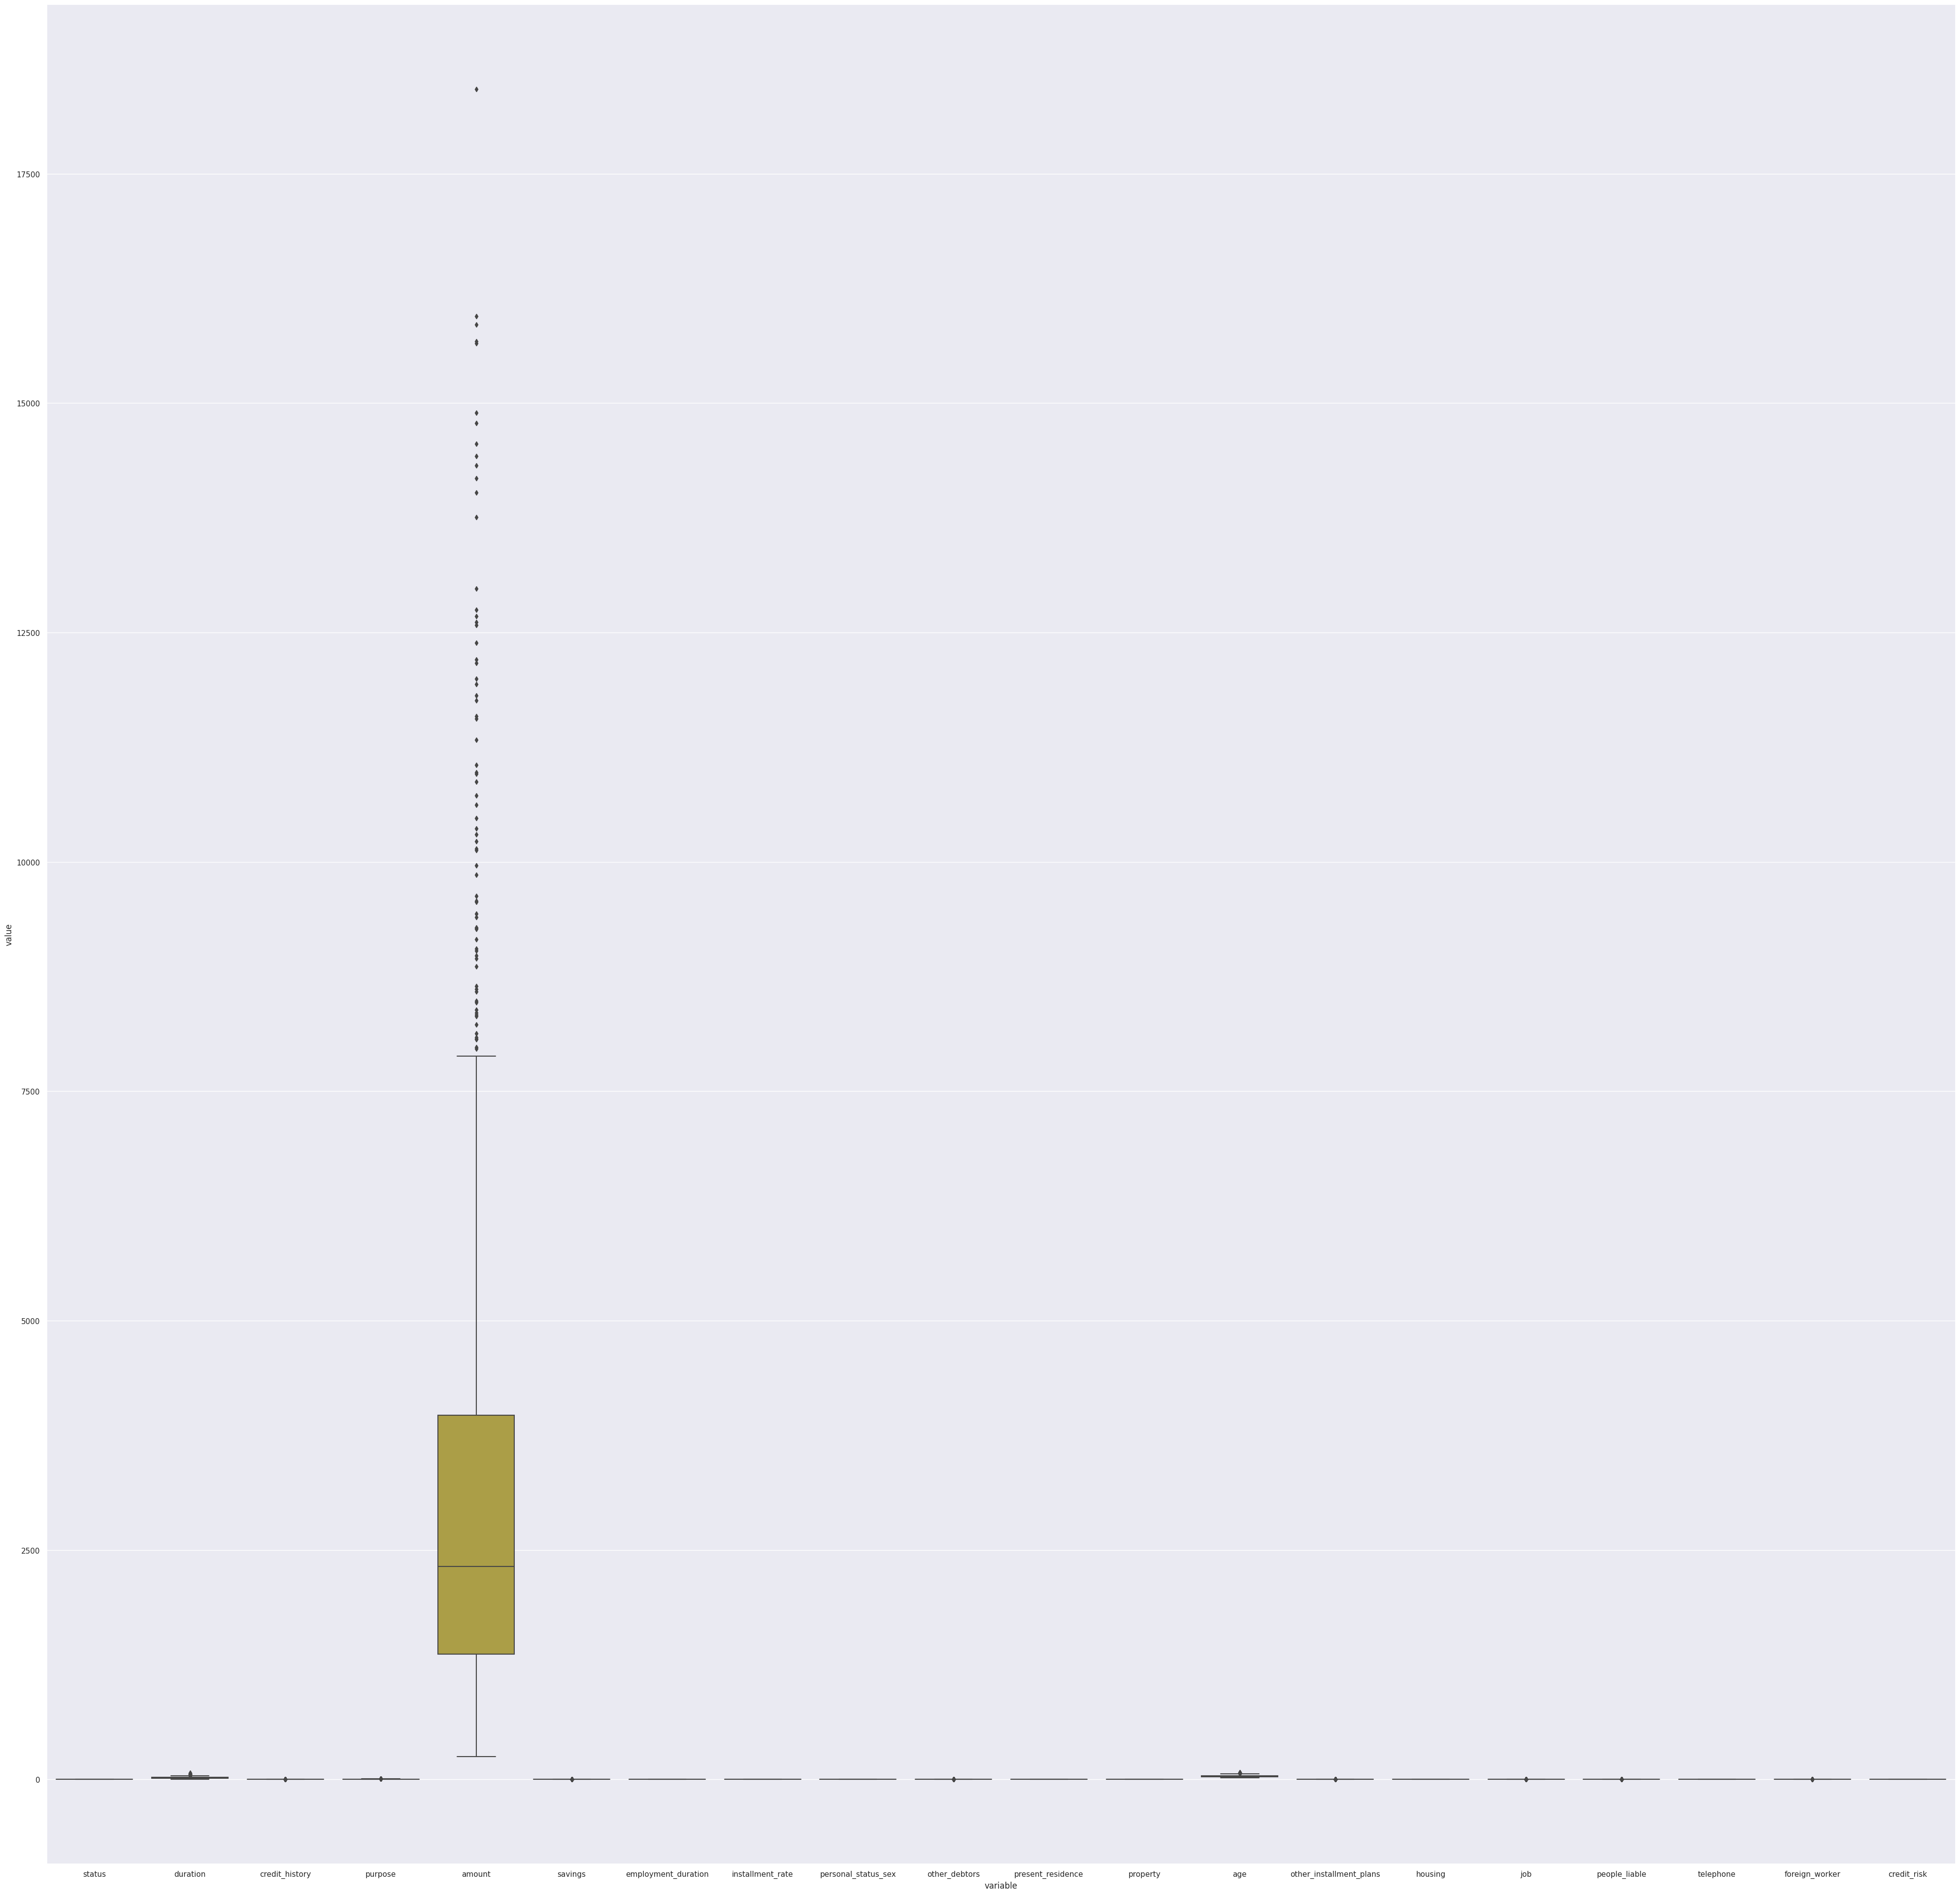

In [ ]:
#Boxplot data awal (masih terdapat noise)
boxplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb3d3daa30>,
      dtype=object)

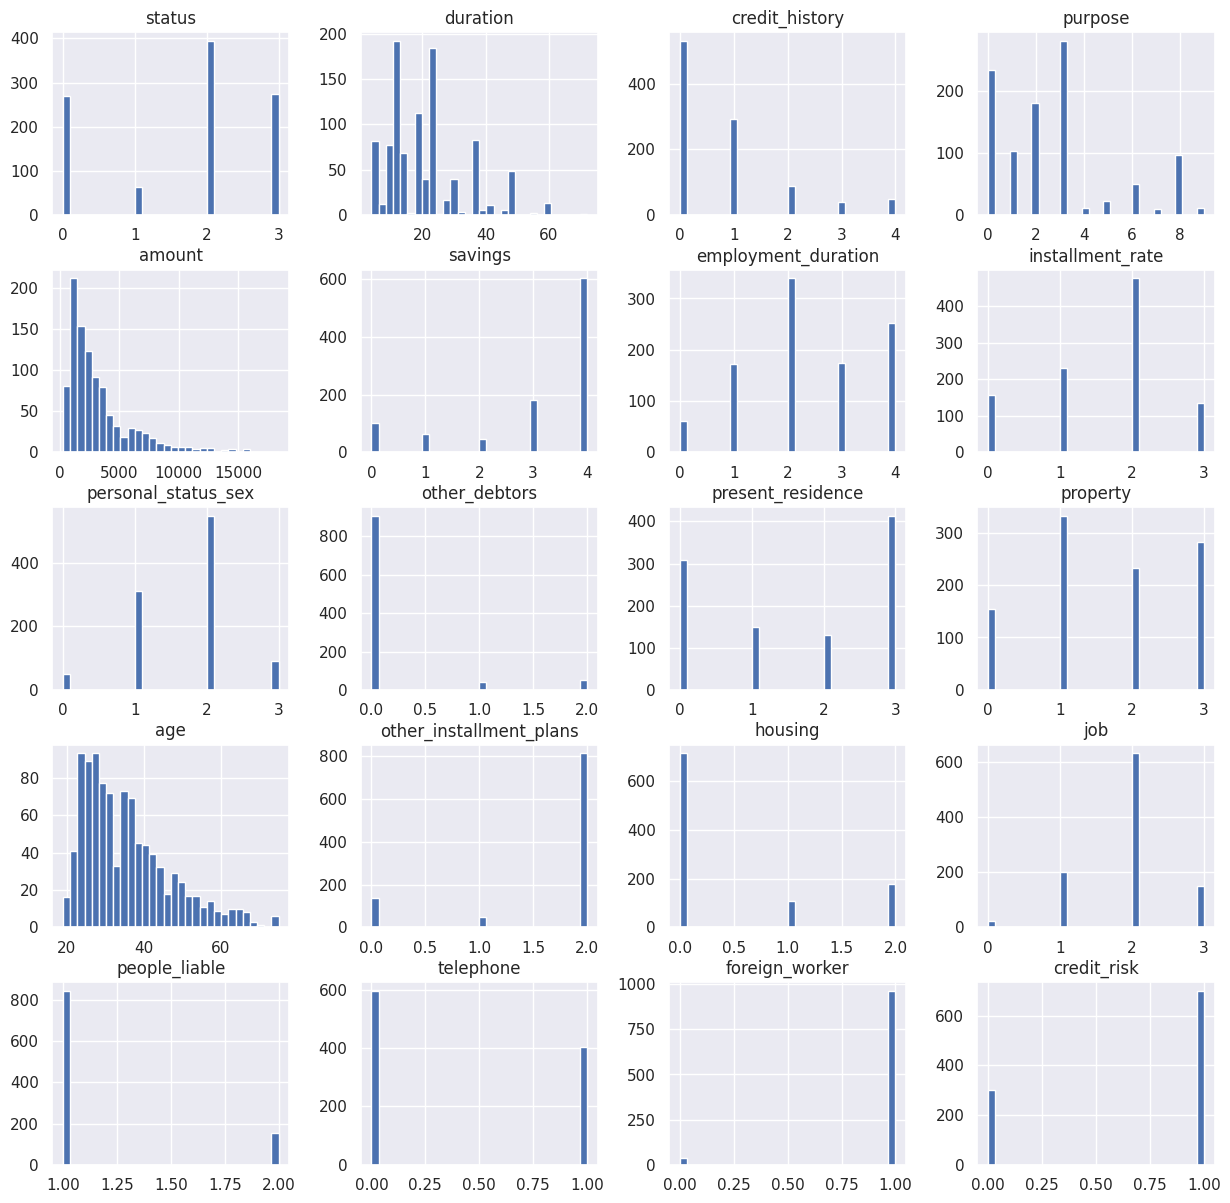

In [ ]:
#Histogram data
data.hist(bins=30, figsize=(15, 15))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

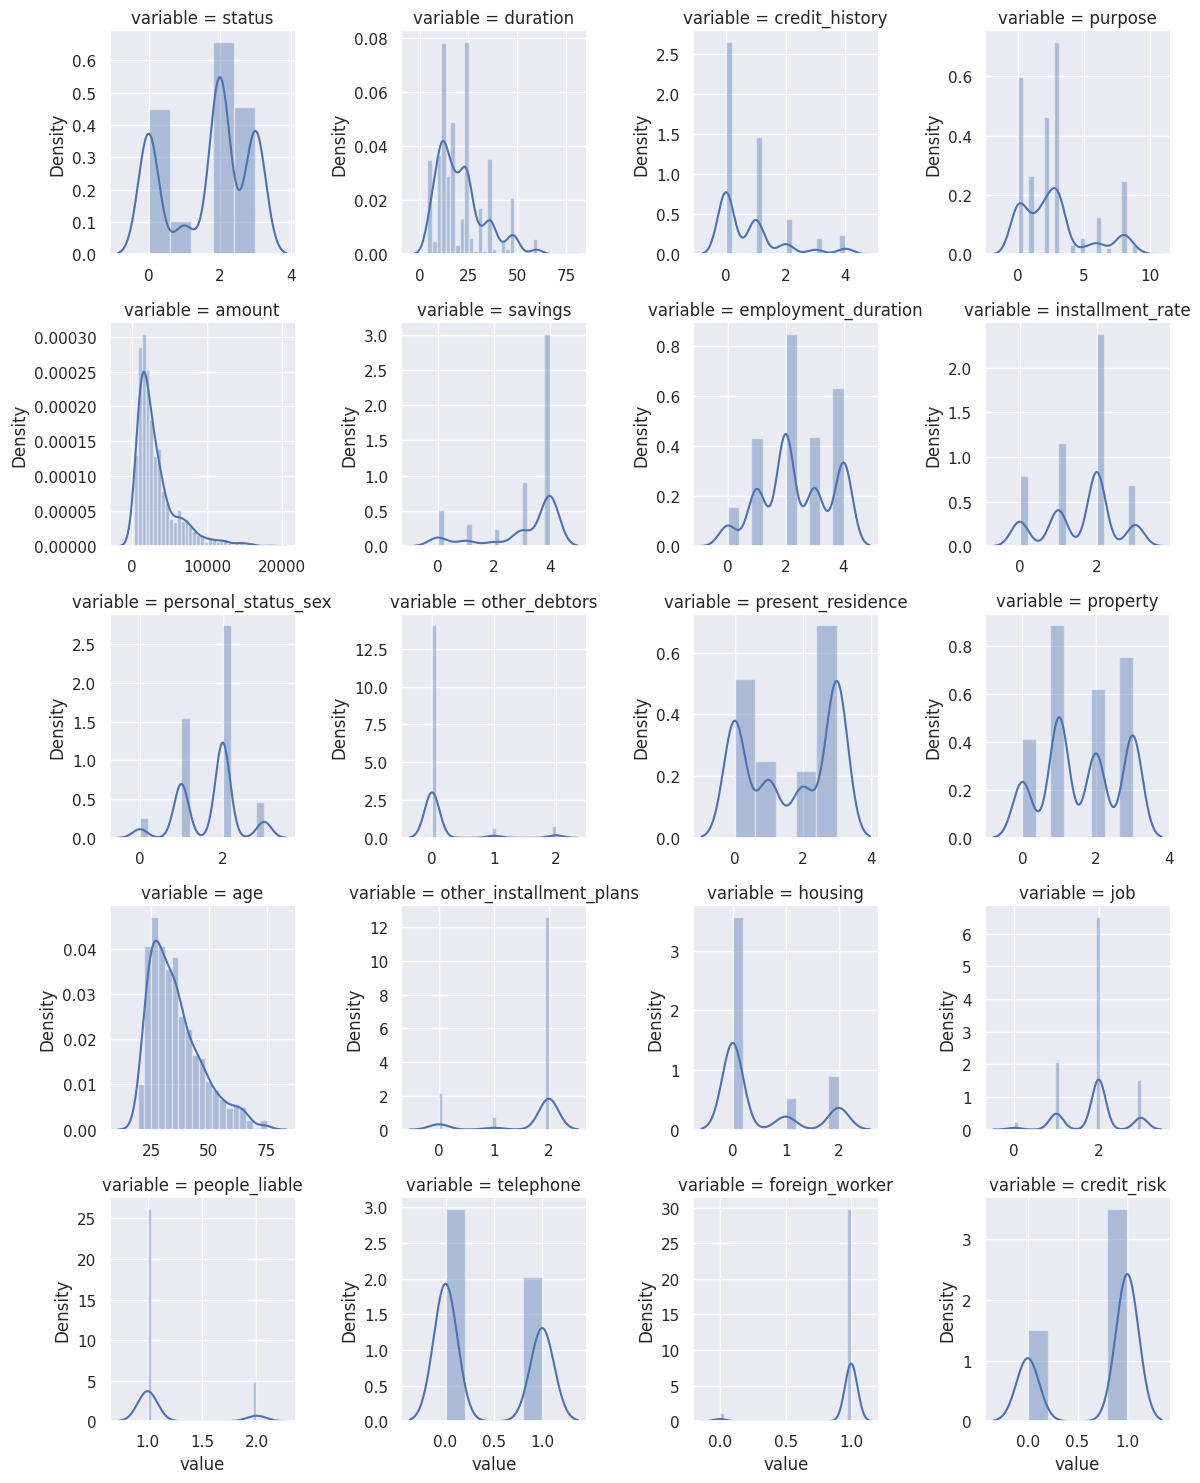

In [ ]:
#Distribusi data
f = pd.melt(data, value_vars=data.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

###DATA PREPROCESSING

Melakukan Proses MinMaxScaler

In [ ]:
#Membuat objek MinMaxScaler
scalled_data = MinMaxScaler().fit_transform(data)

In [ ]:
#Melakukan proses MinMaxScaler pada dataset
new_scalled_data = pd.DataFrame(scalled_data, columns=data.columns)
print(new_scalled_data)

       status  duration  credit_history   purpose    amount  savings  \
0    1.000000  0.205882            0.25  0.222222  0.043964     1.00   
1    1.000000  0.073529            0.25  0.000000  0.140255     1.00   
2    0.000000  0.117647            0.00  0.888889  0.032519     0.00   
3    1.000000  0.117647            0.25  0.000000  0.103004     1.00   
4    1.000000  0.117647            0.25  0.000000  0.105700     1.00   
..        ...       ...             ...       ...       ...      ...   
995  1.000000  0.294118            0.00  0.333333  0.095576     1.00   
996  1.000000  0.294118            0.00  0.000000  0.112964     1.00   
997  0.666667  0.250000            0.25  0.000000  0.683944     0.75   
998  0.000000  0.117647            0.00  0.333333  0.342137     0.75   
999  1.000000  0.382353            0.00  0.222222  0.335644     0.75   

     employment_duration  installment_rate  personal_status_sex  \
0                   0.25          0.666667             0.333333   
1

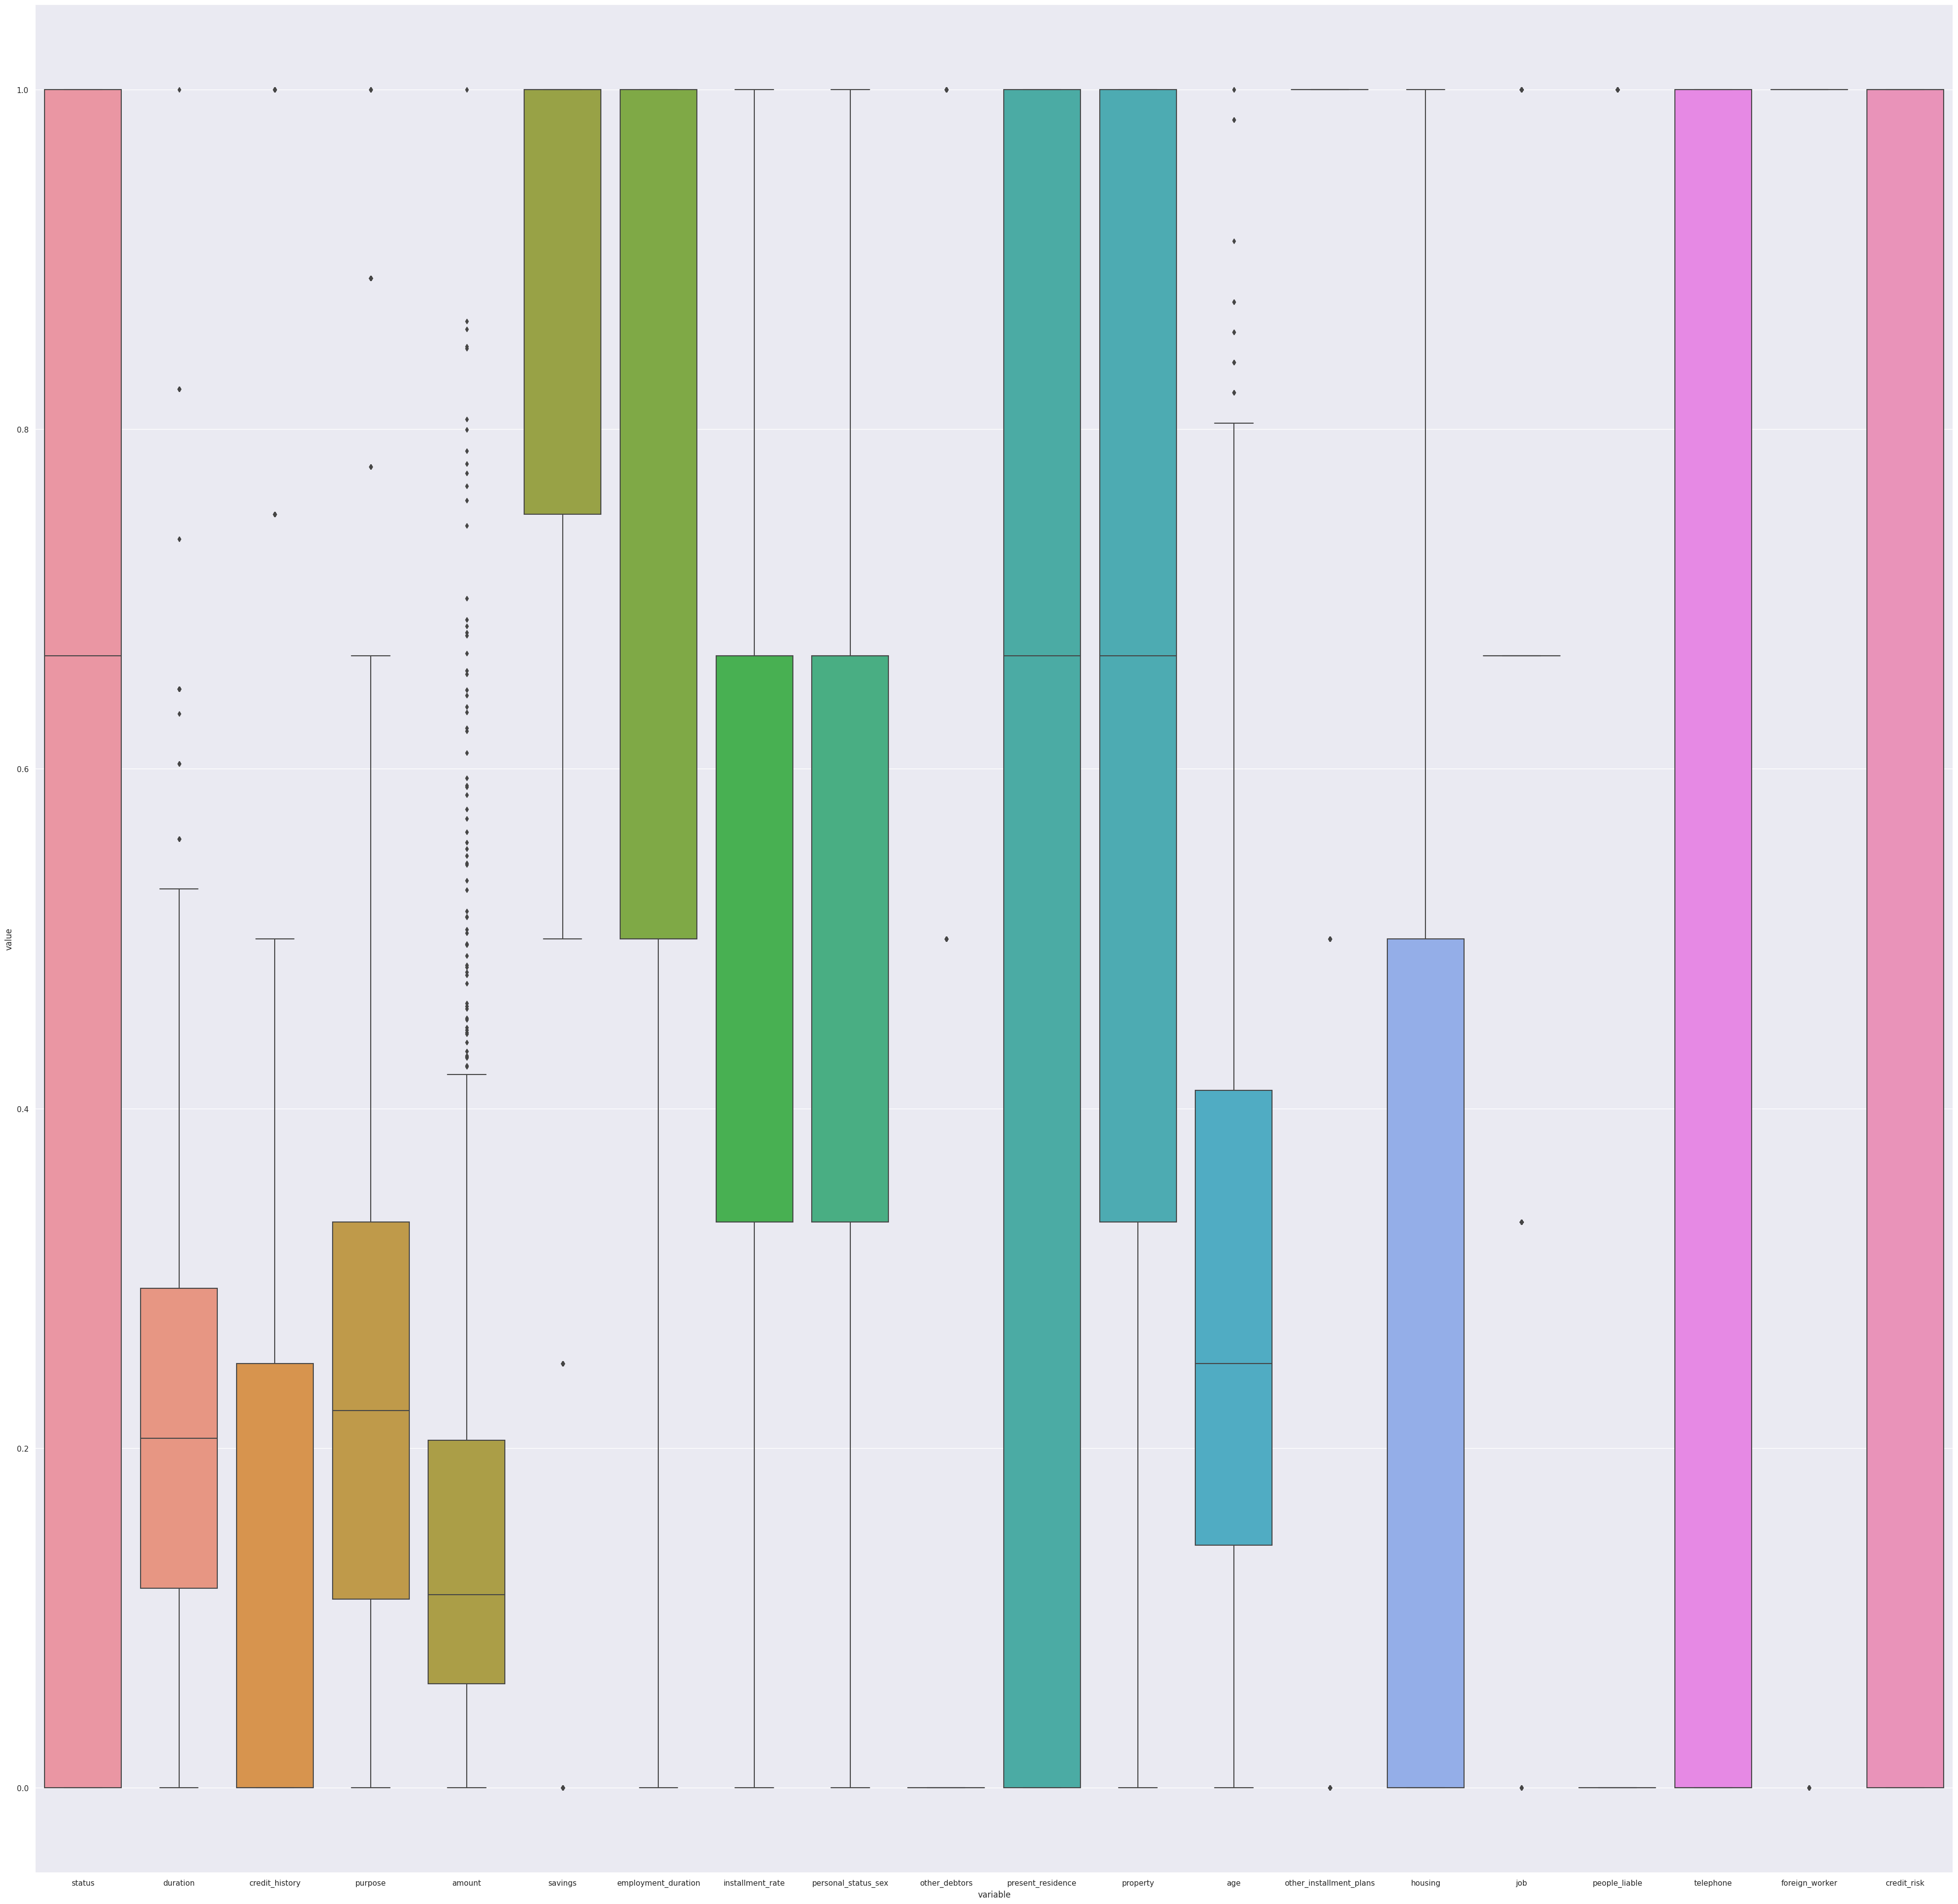

In [ ]:
#Melihat boxplot data hasil MinMaxScaler
boxplot(new_scalled_data)

Menghilangkan Nilai Outlier (Pencilan)

In [ ]:
#Function metode IQR
def InterQuartile(data_frame):
  for i in data_frame.columns:
    q1 = data_frame[i].quantile(0.25)
    q3 = data_frame[i].quantile(0.75)
    inter_quartile_range = q3-q1

    terkecil = q1 - (inter_quartile_range *1.5)
    terbesar = q3 + (inter_quartile_range * 1.5)

    data_frame.loc[data_frame[i] > terbesar , i] = terbesar
    data_frame.loc[data_frame[i] < terkecil , i] = terkecil

In [ ]:
#Menghilangkan pencilan pada dataset
InterQuartile(new_scalled_data)

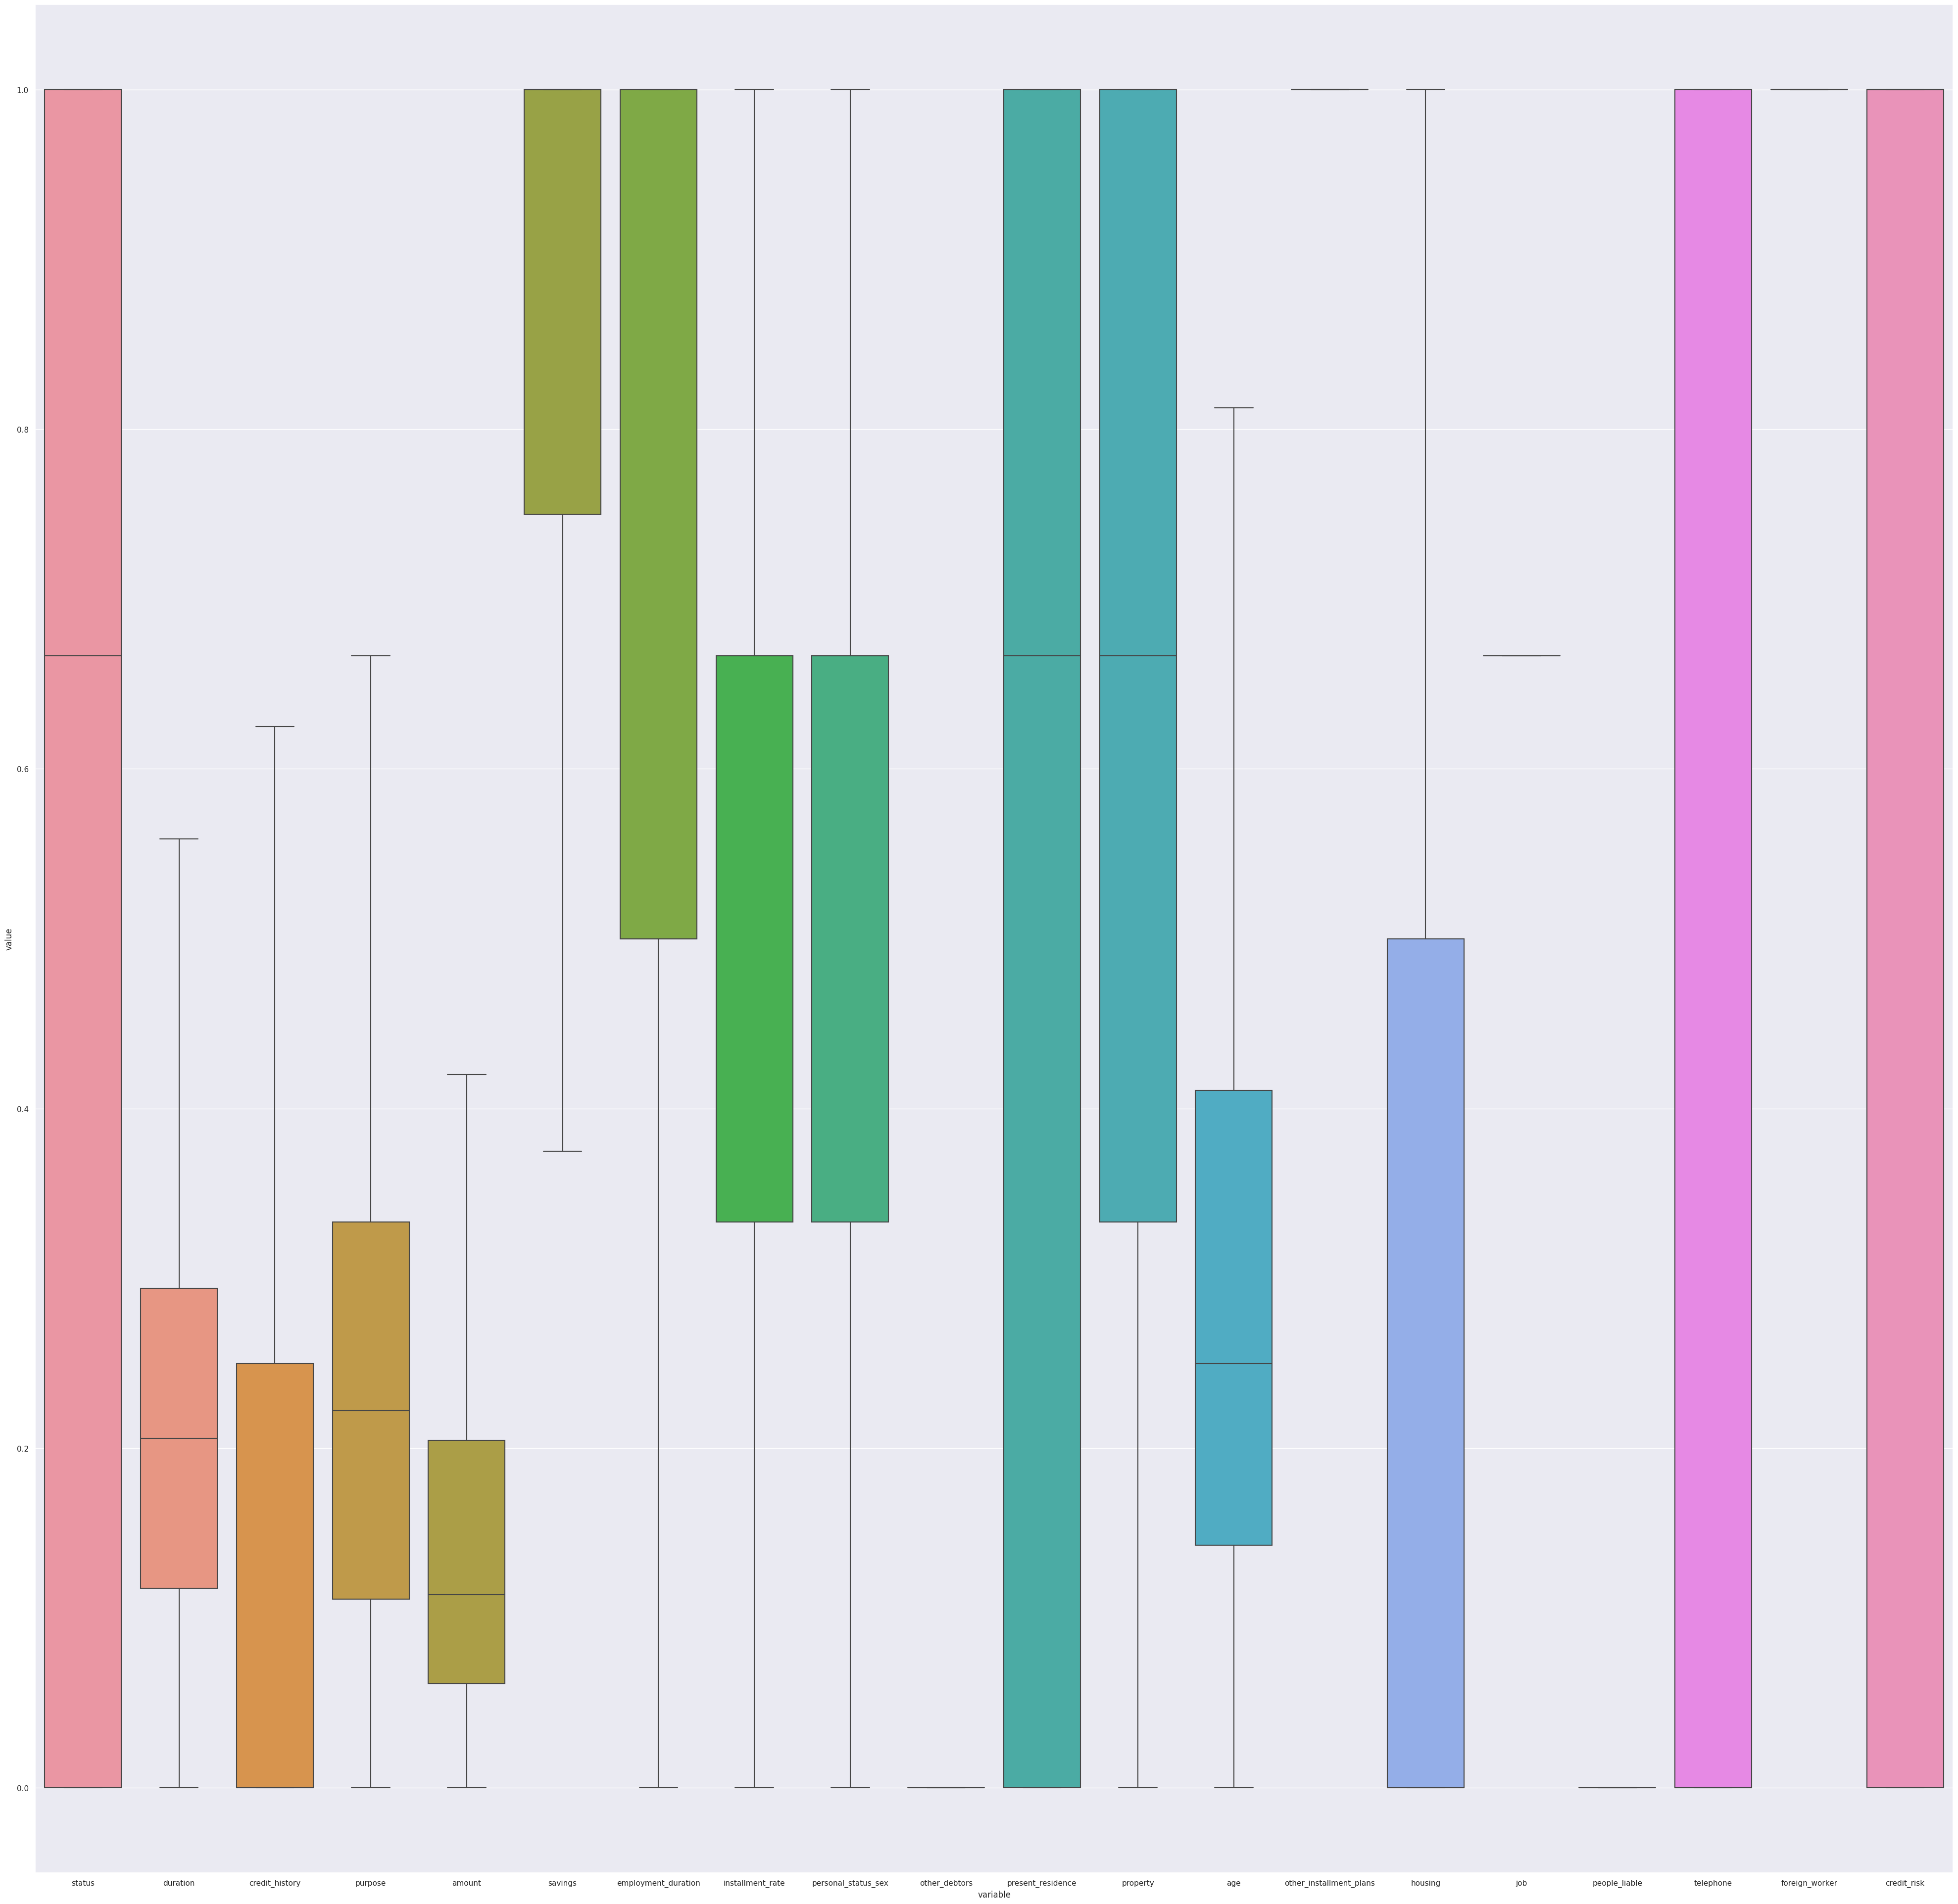

In [ ]:
#Melihat boxplot data yang sudah tidak terdapat pencilan
boxplot(new_scalled_data)

Drop atribut yang tidak memiliki distribusi data

In [ ]:
#Hapus kolom other_debtors
new_scalled_data = new_scalled_data.drop(columns =['other_debtors'], axis=1)

#Hapus kolom other_installment_plans
new_scalled_data = new_scalled_data.drop(columns =['other_installment_plans'], axis=1)

#Hapus kolom job
new_scalled_data = new_scalled_data.drop(columns =['job'], axis=1)

#Hapus kolom people_liable
new_scalled_data = new_scalled_data.drop(columns =['people_liable'], axis=1)

#Hapus kolom foreign_worker
new_scalled_data = new_scalled_data.drop(columns =['foreign_worker'], axis=1)


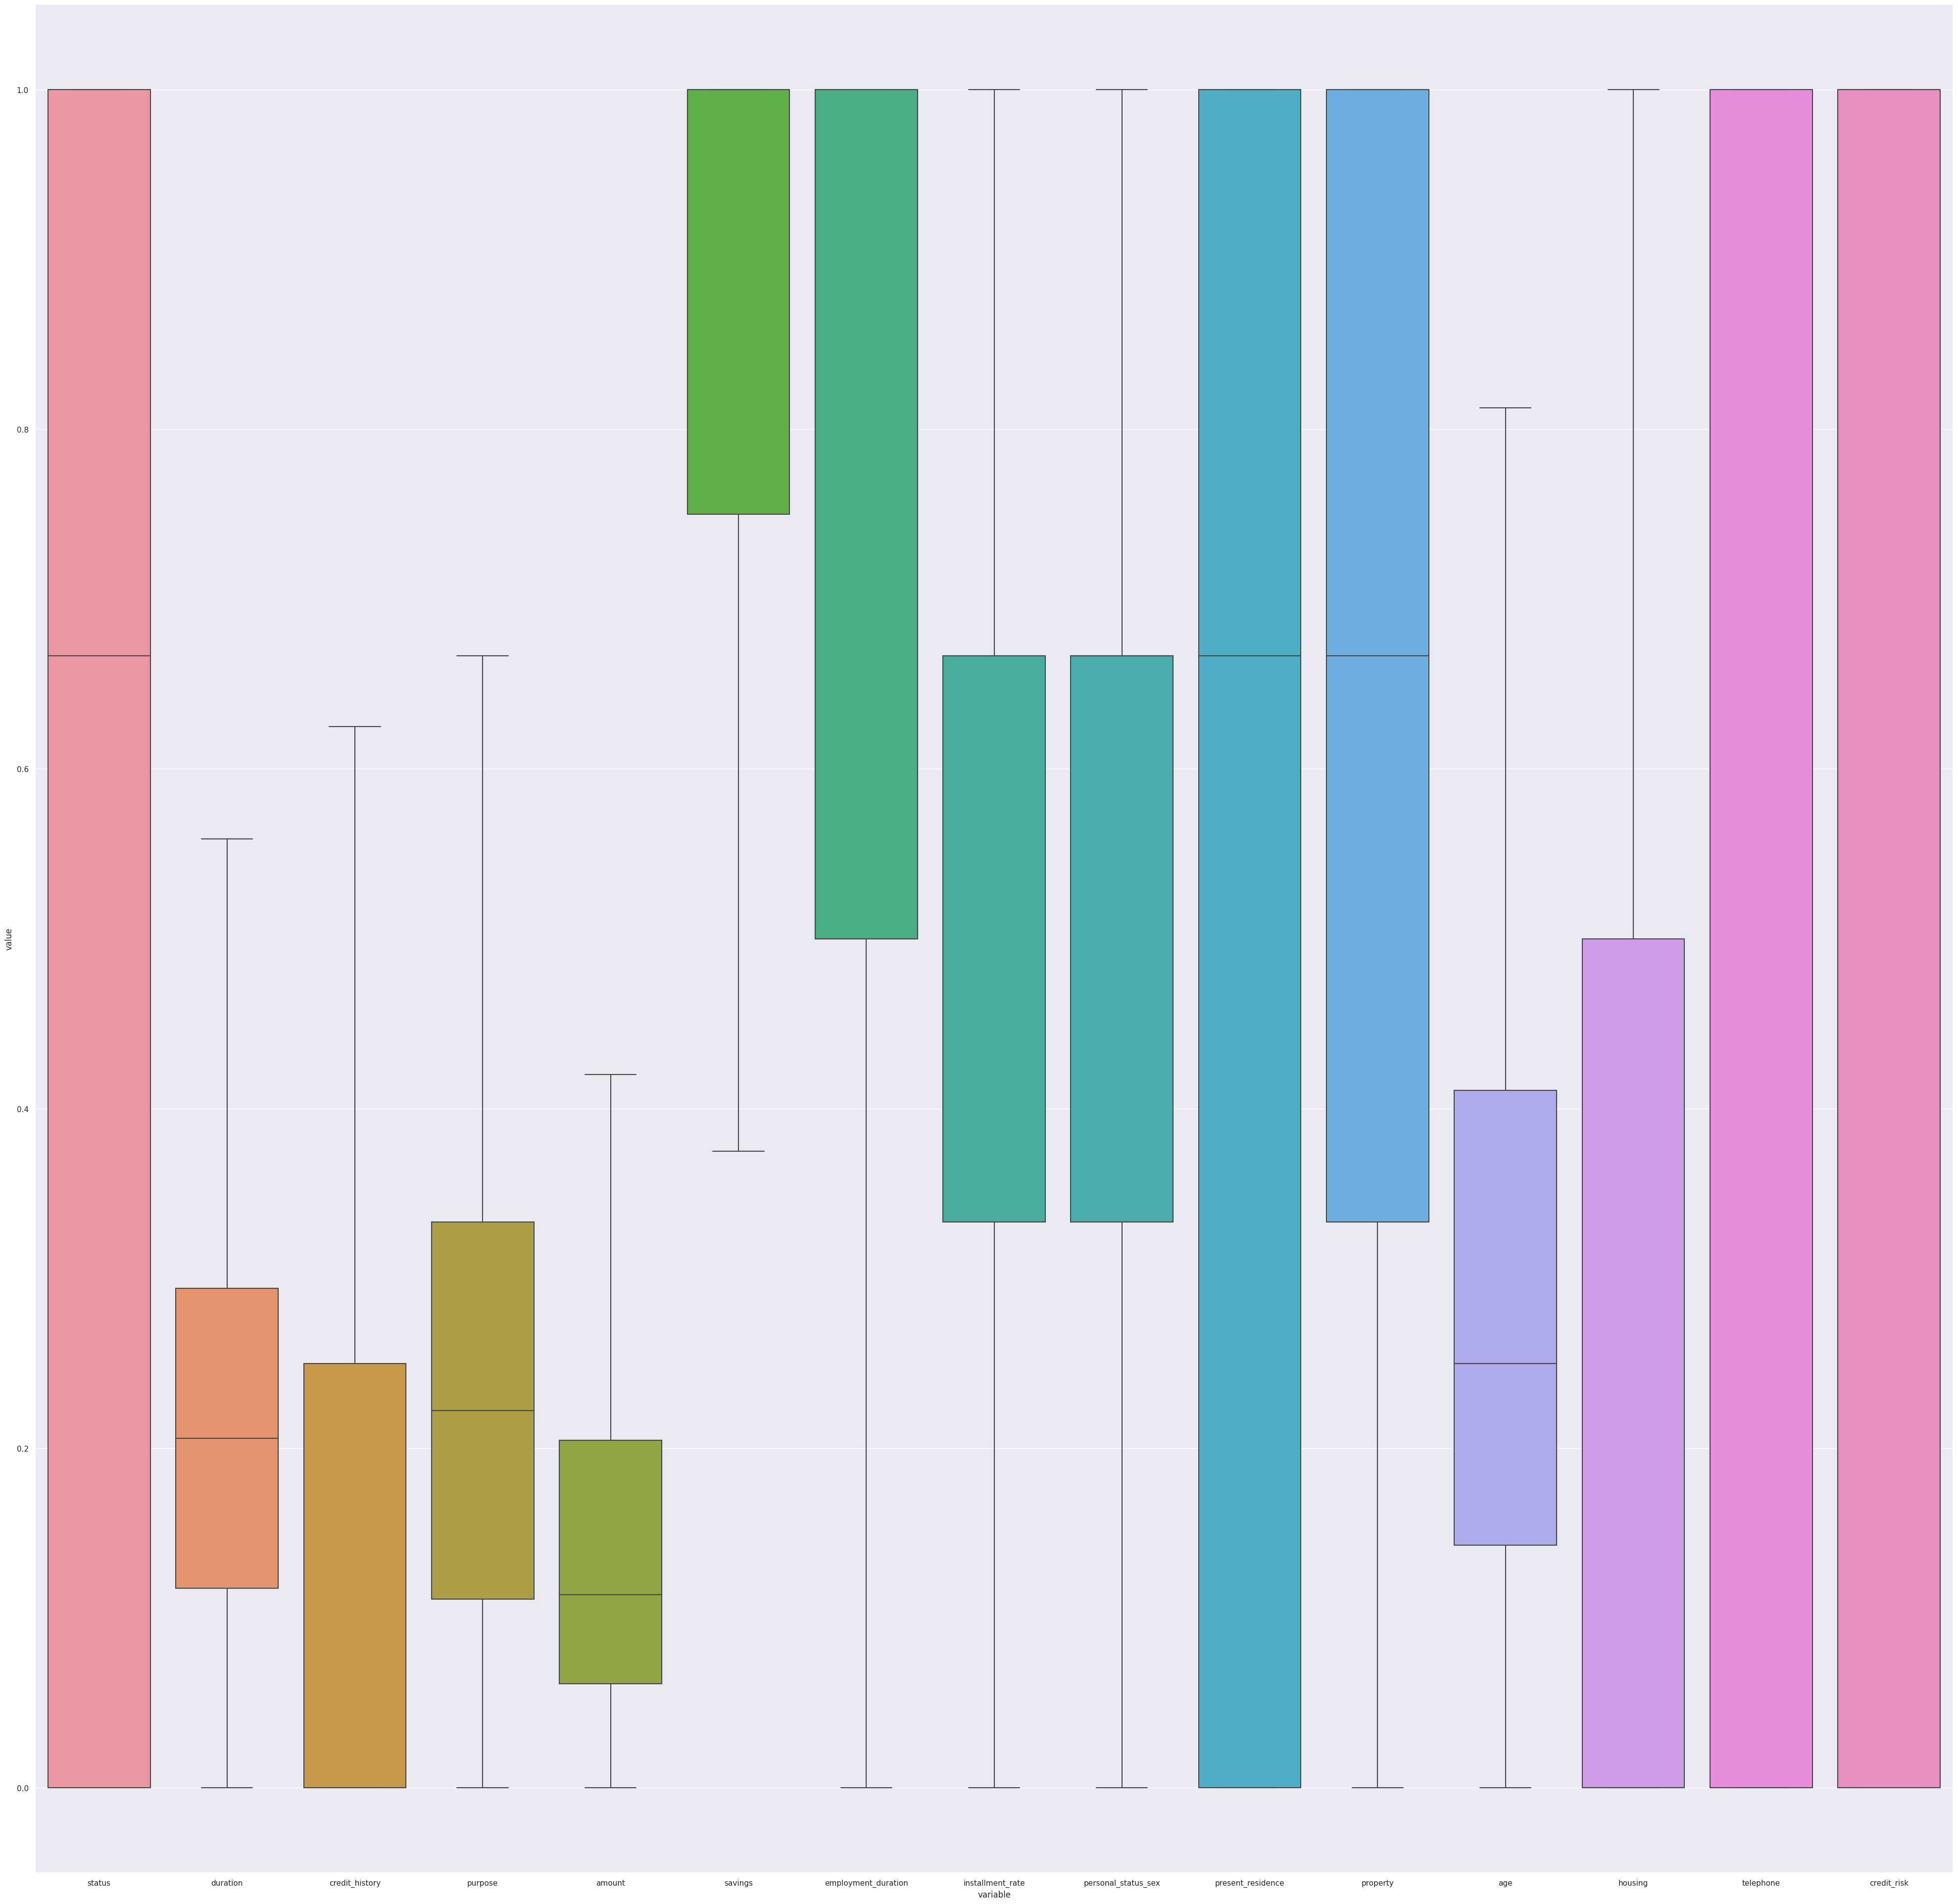

In [ ]:
#Melihat boxplot data yang sudah bersih
boxplot(new_scalled_data)

###MEMBUAT MODEL

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifiera

In [ ]:
new_scalled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status               1000 non-null   float64
 1   duration             1000 non-null   float64
 2   credit_history       1000 non-null   float64
 3   purpose              1000 non-null   float64
 4   amount               1000 non-null   float64
 5   savings              1000 non-null   float64
 6   employment_duration  1000 non-null   float64
 7   installment_rate     1000 non-null   float64
 8   personal_status_sex  1000 non-null   float64
 9   present_residence    1000 non-null   float64
 10  property             1000 non-null   float64
 11  age                  1000 non-null   float64
 12  housing              1000 non-null   float64
 13  telephone            1000 non-null   float64
 14  credit_risk          1000 non-null   float64
dtypes: float64(15)
memory usage: 117.3 KB


***Split Data***

In [ ]:
x = new_scalled_data.iloc[:, :-1]
y = new_scalled_data['credit_risk']

In [ ]:
#Proses split data (Data Training = 80% ; Data Testing = 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

***Algoritma Decision Tree***

In [ ]:
#Membangun model decision tree
model_dtree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
model_dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [ ]:
print('Model test Score: ', model_dtree.score(x_test, y_test),
      'Model training Score: ', model_dtree.score(x_train, y_train))

Model test Score:  0.695 Model training Score:  0.69625


***AdaBoost Clasifier***

In [ ]:
#Base model yang digunakan pada algoritma adaboost
dtree = DecisionTreeClassifier(max_depth = 1, random_state=1)

#Membangun model
adaBoost = AdaBoostClassifier(base_estimator = dtree, n_estimators=25,
                                   learning_rate=1)

#Fitting model
adaBoost.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=1, n_estimators=25)

***Melihat Akurasi***

In [ ]:
#Nilai akurasi pada data training

hasil_predict_train = adaBoost.predict(x_train)
print("Accuracy prediksi data train : ",metrics.accuracy_score(hasil_predict_train, y_train))

Accuracy prediksi data train :  0.78375


In [ ]:
#Nilai akurasi pada data testing

hasil_predict_test = adaBoost.predict(x_test)
print("Accuracy prediksi data test : ",metrics.accuracy_score(hasil_predict_test, y_test))

Accuracy prediksi data test :  0.77
